In [1]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# continuous_factory_process.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('data/continuous_factory_process.csv', delimiter=',')
df1.dataframeName = 'continuous_factory_process.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14088 rows and 116 columns


In [3]:
df1.head(5)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [4]:
# deleting the first column

df1 = df1.drop(columns = ['time_stamp'], axis = 1)

# checking the shape of the data after deleting a column
df1.shape

(14088, 115)

In [5]:
#See if there is any missing values that will cause issues
nullval_count_column = (df1.isnull().sum())
nullval_count_column

AmbientConditions.AmbientHumidity.U.Actual       0
AmbientConditions.AmbientTemperature.U.Actual    0
Machine1.RawMaterial.Property1                   0
Machine1.RawMaterial.Property2                   0
Machine1.RawMaterial.Property3                   0
Machine1.RawMaterial.Property4                   0
Machine1.RawMaterialFeederParameter.U.Actual     0
Machine1.Zone1Temperature.C.Actual               0
Machine1.Zone2Temperature.C.Actual               0
Machine1.MotorAmperage.U.Actual                  0
Machine1.MotorRPM.C.Actual                       0
Machine1.MaterialPressure.U.Actual               0
Machine1.MaterialTemperature.U.Actual            0
Machine1.ExitZoneTemperature.C.Actual            0
Machine2.RawMaterial.Property1                   0
Machine2.RawMaterial.Property2                   0
Machine2.RawMaterial.Property3                   0
Machine2.RawMaterial.Property4                   0
Machine2.RawMaterialFeederParameter.U.Actual     0
Machine2.Zone1Temperature.C.Act

In [6]:
#filter the y variables (Output measurement actuals) for prediction 

df2=df1.filter(regex='Stage1', axis=1).filter(regex='Actual', axis=1)
df2

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,12.720000,0.000000,12.160000,21.970000,0.000000,0.000000e+00,3.820000,2.940000,20.820000,17.300000,8.060000,5.540000,1.660000,2.690000,14.51000
1,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
2,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
3,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
4,12.290000,0.000000,0.000000,17.830000,31.440000,0.000000e+00,3.870000,0.000000,0.000000,17.300000,7.540000,5.150000,1.150000,2.720000,0.00000
5,12.290000,0.000000,0.000000,17.830000,31.440000,0.000000e+00,3.870000,0.000000,0.000000,17.300000,7.540000,5.150000,1.150000,2.720000,0.00000
6,12.540000,0.000000,11.890000,21.960000,0.000000,0.000000e+00,3.680000,2.920000,20.650000,17.310000,7.970000,5.340000,1.620000,2.650000,14.60000
7,12.540000,0.000000,11.890000,21.960000,0.000000,0.000000e+00,3.680000,2.920000,20.650000,17.310000,7.970000,5.340000,1.620000,2.650000,14.60000
8,12.350000,0.000000,0.000000,18.100000,31.830000,0.000000e+00,1.670000,0.000000,0.000000,17.340000,0.000000,0.000000,0.000000,1.770000,0.00000
9,12.350000,0.000000,0.000000,18.100000,31.830000,0.000000e+00,1.670000,0.000000,0.000000,17.340000,0.000000,0.000000,0.000000,1.770000,0.00000


In [8]:
# separating the dependent and independent data
X=df1.drop(ylist, axis=1)
y = df2

In [7]:
#create list of columns names for x and y separation
ylist=df2.columns.to_list()
range(len(ylist)-1)

range(0, 14)

In [69]:
# splitting them into train test 

from sklearn.model_selection import train_test_split


    
x_train, x_test, y_train, y_test = train_test_split(X, y.iloc[:, 0 ], test_size = 0.2, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (11270, 100)
shape of x_test:  (2818, 100)
shape of y_train:  (11270,)
shape of y_test:  (2818,)


In [70]:
y_train

9736     12.92
13074    12.92
12313    12.98
8883     13.09
4841     13.08
3002     13.09
10800    12.98
7897     13.06
9537     12.94
2930     13.13
6038     13.09
9332     12.95
8370     13.02
580      12.81
4627     12.98
6043     13.07
13233    12.91
2171     12.79
5857     13.04
3990     12.87
10460    12.95
6239     13.06
12460    12.83
10763    13.01
6672     13.06
5584     13.02
13421    12.97
3294     13.10
347      12.73
12109    12.98
         ...  
2046     12.90
7877     13.07
4851     13.09
5072     13.05
2163     12.53
6036     13.06
6921     13.07
6216     13.09
11085    12.93
537      12.74
9893     12.95
2897     13.07
7768     13.10
2222     13.12
10327    12.93
2599     12.74
705      12.79
3468     13.13
6744     13.09
5874     13.04
4373     12.99
7891     13.08
9225     12.91
14019    12.90
4859     13.08
13123    12.90
3264     13.10
9845     12.87
10799    13.00
2732     13.09
Name: Stage1.Output.Measurement0.U.Actual, Length: 11270, dtype: float64

In [71]:
# splitting them into train test and split each 15 

from sklearn.model_selection import train_test_split


y_train_list=[]
y_test_list=[]

#forward loop creates a list of 15 y (pandas series)
for n in range(len(ylist)-1):  
    X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, n ], test_size = 0.2, random_state = 0)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
# getting  shapes of data
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (11270, 100)
shape of x_test:  (2818, 100)
shape of y_train:  (11270,)
shape of y_test:  (2818,)


In [72]:
y_train_list[0]

9736     12.92
13074    12.92
12313    12.98
8883     13.09
4841     13.08
3002     13.09
10800    12.98
7897     13.06
9537     12.94
2930     13.13
6038     13.09
9332     12.95
8370     13.02
580      12.81
4627     12.98
6043     13.07
13233    12.91
2171     12.79
5857     13.04
3990     12.87
10460    12.95
6239     13.06
12460    12.83
10763    13.01
6672     13.06
5584     13.02
13421    12.97
3294     13.10
347      12.73
12109    12.98
         ...  
2046     12.90
7877     13.07
4851     13.09
5072     13.05
2163     12.53
6036     13.06
6921     13.07
6216     13.09
11085    12.93
537      12.74
9893     12.95
2897     13.07
7768     13.10
2222     13.12
10327    12.93
2599     12.74
705      12.79
3468     13.13
6744     13.09
5874     13.04
4373     12.99
7891     13.08
9225     12.91
14019    12.90
4859     13.08
13123    12.90
3264     13.10
9845     12.87
10799    13.00
2732     13.09
Name: Stage1.Output.Measurement0.U.Actual, Length: 11270, dtype: float64

In [83]:
# standardization of x variables

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the Model

In [73]:
#Creating the Model

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


model = XGBClassifier(nthread=6, max_depth=10) #nthreads allows more core usage
#run time without nthread = 8:29
#run time with nthread = 2:02

model.fit(X_train, y_train_list[0]) #possible .iloc

y_pred = model.predict(X_test)
y_pred.shape

(2818,)

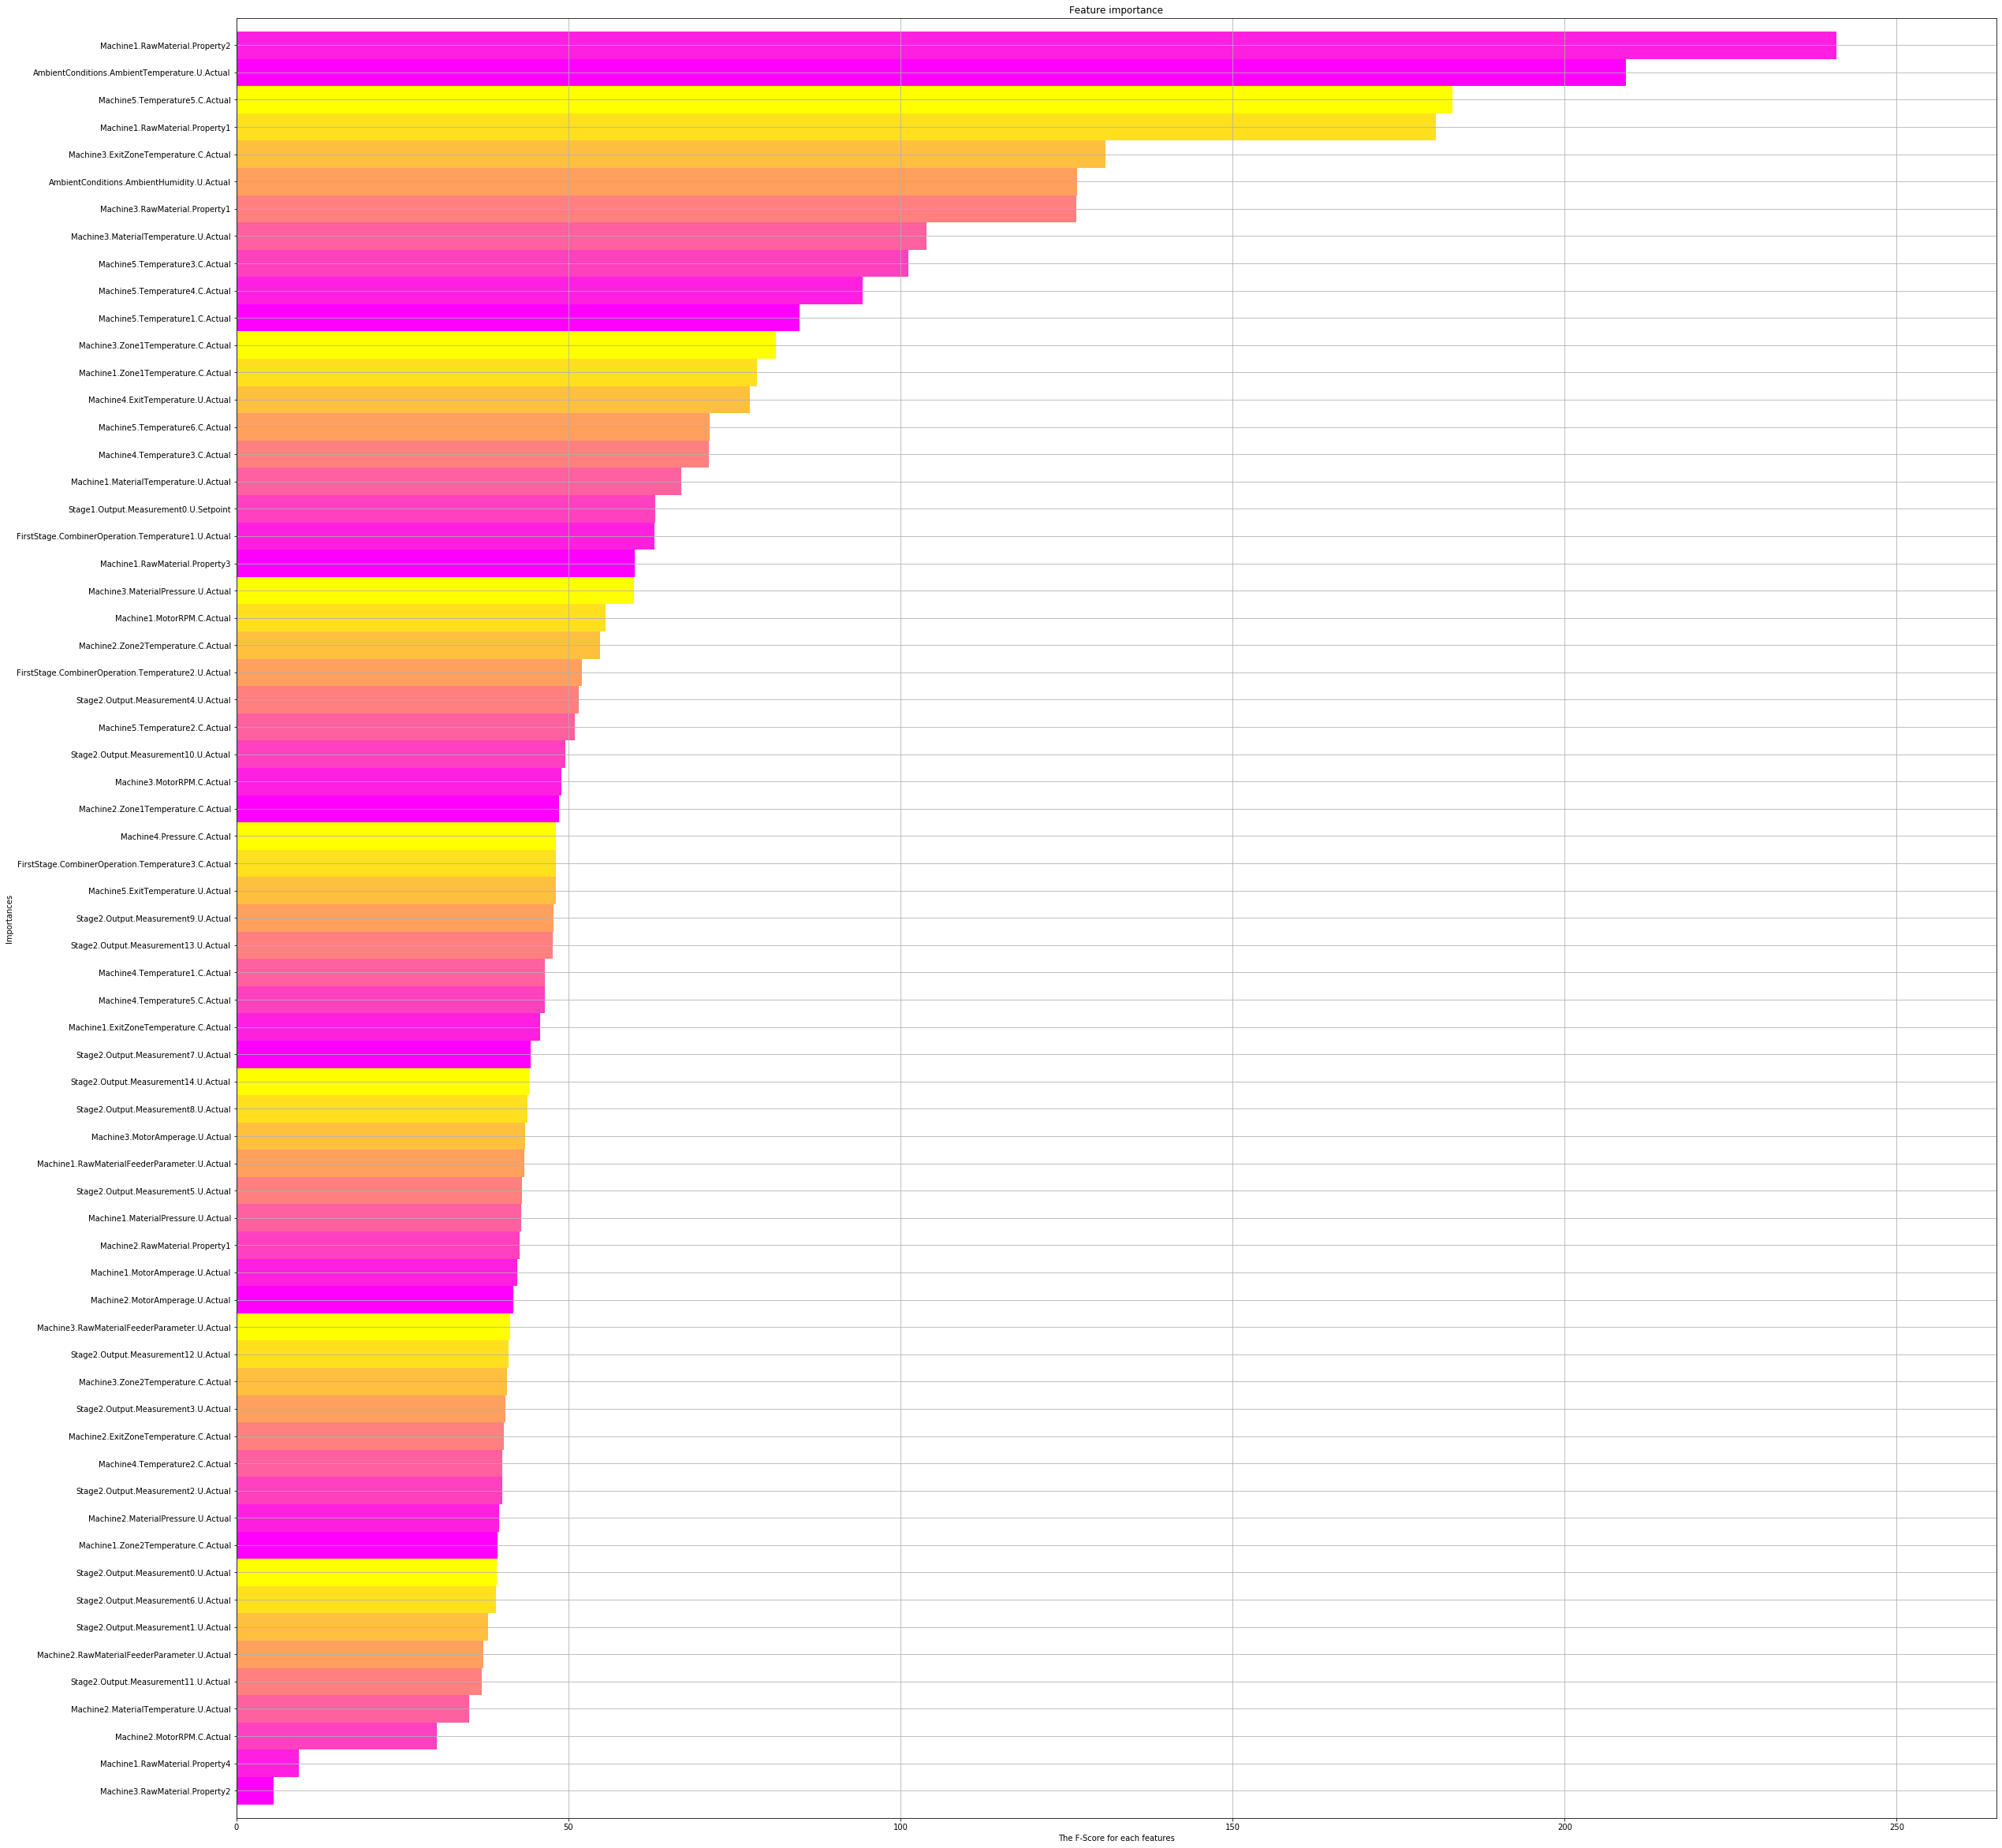

In [48]:
#Significance testing
# Bar plot the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (40, 42)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()


In [26]:
#Gridsearch on parameters

# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
parameters = [{'max_depth' : [1, 10, 5, 7]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 2, n_jobs = -1)
#n_jobs=-1 means all cores are used


grid_search = grid_search.fit(X_train, y_train)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#run time 6:59

In [88]:
#Unsupervised Feature pruning
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)
X_pca.shape

(14088, 30)

In [28]:
print(best_parameters)

{'max_depth': 10}

In [61]:

y_pred = model.predict(X_test)

y_pred

array([12.75, 13.03, 12.82, ..., 13.05, 12.97, 13.06])

In [76]:
from sklearn.metrics import mean_squared_error
#Finding the RMSE and R2 score

MSE = mean_squared_error(y_test_list[0], y_pred)
RMSE=np.sqrt(MSE)
RMSE

0.5895697406101654

In [79]:
y_pred

array([12.75, 13.03, 12.92, ..., 13.05, 12.94, 13.06])

In [80]:
y_test_list[0]

154      12.76
5831     13.04
3848     12.79
33       12.65
5210     13.04
1746     12.89
5502     13.03
10347    12.93
10948    12.96
10132    12.95
12905    12.88
9296     12.94
11744    12.98
7038     13.05
424      13.09
13651    12.90
467      12.70
5244     13.04
3872     12.84
14082    12.61
10286    13.00
675      12.79
1292     12.74
5561     13.02
12035    12.94
7439     13.05
174      12.74
5941     13.03
4066     12.82
7911     13.09
         ...  
2263     13.18
5702     13.04
382      12.69
12189    12.94
247      12.73
11754    12.93
4688     13.02
7747     13.06
9032     13.07
6877     13.01
2054     12.89
14033    12.91
13819    12.90
4324     12.79
799      12.80
6193     13.05
7154     13.03
180      12.76
2206     13.33
10084    12.93
6774     13.05
4070     12.82
8334     13.07
8436     13.09
1218     12.74
10431    12.95
9342     12.92
7158     13.06
9495     12.94
6971     13.07
Name: Stage1.Output.Measurement0.U.Actual, Length: 2818, dtype: float64

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test_list[0], y_pred)

0.6383838642583951

In [52]:
X_train

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
9736,14.04,24.19,12.90,215,980.53,251,1247.52,72.0,71.5,62.96,...,7.76,7.93,5.57,5.65,2.11,1.85,3.77,2.89,7.82,11.71
13074,14.04,24.19,11.54,200,1027.43,247,862.89,72.0,72.3,70.90,...,7.87,7.93,5.52,5.65,2.00,1.85,3.72,2.89,7.77,11.71
12313,13.94,24.33,11.54,200,1027.43,247,1042.61,72.0,72.1,72.52,...,7.92,7.93,5.57,5.65,2.05,1.85,3.72,2.89,8.07,11.71
8883,14.42,23.32,12.90,215,980.53,251,1257.53,72.0,72.5,64.58,...,7.84,7.93,5.55,5.65,2.04,1.85,3.52,2.89,7.83,11.71
4841,16.63,23.67,11.54,200,963.00,247,1267.82,72.0,71.6,71.30,...,7.89,7.93,5.82,5.65,2.06,1.85,3.38,2.89,8.03,11.71
3002,16.83,23.93,11.54,200,963.00,247,1265.71,72.0,71.4,73.59,...,7.91,7.93,5.89,5.65,2.06,1.85,3.49,2.89,7.67,11.71
10800,14.04,23.93,12.59,236,601.11,257,1265.98,72.0,71.6,64.58,...,7.82,7.93,5.57,5.65,2.05,1.85,3.84,2.89,7.74,11.71
7897,14.83,23.36,11.54,200,1027.43,247,1273.54,72.0,71.5,72.25,...,8.03,7.93,5.61,5.65,2.09,1.85,3.50,2.89,8.09,11.71
9537,14.23,24.00,12.90,215,980.53,251,973.60,72.0,71.4,63.64,...,7.82,7.93,5.58,5.65,2.13,1.85,3.72,2.89,7.83,11.71
2930,16.83,23.93,11.54,200,963.00,247,1259.22,72.0,72.6,73.05,...,7.90,7.93,5.76,5.65,2.05,1.85,3.47,2.89,8.00,11.71


In [ ]:
#Prediction horizon

In [ ]:
#Scoring Predictions